In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [2]:
nb_classes = 10

model = Sequential()
model.add(Dense(256,activation='relu',input_shape=(784,)))
model.add(Dense(256,activation='relu'))
model.add(Dense(nb_classes,activation='softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer=SGD(learning_rate=0.001),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [3]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
y_test.shape

(10000,)

In [8]:
y_train[0]

5

In [9]:
X_train= X_train.reshape(-1,784)
X_train.shape

(60000, 784)

In [10]:
X_test= X_test.reshape(-1,784)
X_train = X_train.astype("float32")
X_test= X_test.astype('float32')
X_train /=255
X_test /=255
Y_train = to_categorical(y_train,nb_classes)
y_train[2]

4

In [11]:
Y_train[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [12]:
Y_test= to_categorical(y_test,nb_classes)

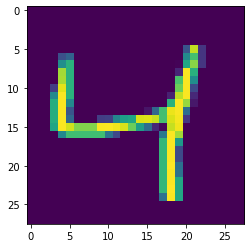

In [13]:
plt.imshow(X_train[2].reshape(28,28))

In [14]:
from tensorflow.keras.callbacks import TensorBoard
tb = TensorBoard(log_dir='logs', histogram_freq=1, write_graph=1)

In [15]:
network_history = model.fit(X_train,Y_train, batch_size=128,epochs=30,
                            verbose=1,validation_split=0.2,callbacks=[tb])

Epoch 1/30
375/375 [==============================] - 3s 5ms/step - loss: 2.2259 - accuracy: 0.2282 - val_loss: 2.1124 - val_accuracy: 0.3832
Epoch 2/30
375/375 [==============================] - 2s 5ms/step - loss: 2.0169 - accuracy: 0.5104 - val_loss: 1.9017 - val_accuracy: 0.6298
Epoch 3/30
375/375 [==============================] - 1s 4ms/step - loss: 1.7997 - accuracy: 0.6647 - val_loss: 1.6696 - val_accuracy: 0.7234
Epoch 4/30
375/375 [==============================] - 2s 4ms/step - loss: 1.5667 - accuracy: 0.7277 - val_loss: 1.4305 - val_accuracy: 0.7616
Epoch 5/30
375/375 [==============================] - 2s 5ms/step - loss: 1.3427 - accuracy: 0.7581 - val_loss: 1.2149 - val_accuracy: 0.7854
Epoch 6/30
375/375 [==============================] - 2s 5ms/step - loss: 1.1518 - accuracy: 0.7797 - val_loss: 1.0391 - val_accuracy: 0.8062
Epoch 7/30
375/375 [==============================] - 2s 5ms/step - loss: 1.0011 - accuracy: 0.7990 - val_loss: 0.9040 - val_accuracy: 0.8253
Epoch 

In [16]:
%load_ext tensorboard
%tensorboard --logdir logs

In [17]:
!pip3 install keras-visualizer


In [20]:
from keras_visualizer import visualizer 
import matplotlib.image as mpimg
visualizer(model, format='png', view=True)
img = mpimg.imread('graph.png')
fig = plt.figure(figsize=[20,9])
plt.imshow(img)
plt.axis('off');

ValueError: Keras Visualizer: Error while visualizing

In [21]:
preds=model.predict(X_test)

In [22]:
preds.shape

(10000, 10)

In [23]:
preds[0]

array([5.25198877e-04, 5.09110077e-06, 1.08488355e-04, 2.00657733e-03,
       1.09892979e-04, 1.60745418e-04, 3.97224630e-06, 9.89552557e-01,
       1.26652143e-04, 7.40088196e-03], dtype=float32)

In [24]:
np.argmax(preds[0])

7

In [25]:
from sklearn.metrics import confusion_matrix
conf=confusion_matrix(y_test,np.argmax(preds,axis=1))

In [26]:
conf

array([[ 955,    0,    3,    1,    0,    8,    9,    1,    3,    0],
       [   0, 1108,    3,    4,    1,    1,    4,    1,   13,    0],
       [  13,    4,  896,   19,   21,    2,   17,   17,   34,    9],
       [   4,    2,   21,  901,    0,   32,    4,   16,   20,   10],
       [   1,    8,    5,    1,  897,    1,   13,    2,    7,   47],
       [  18,    4,    7,   50,   16,  727,   17,   10,   35,    8],
       [  19,    3,    9,    3,   11,   16,  892,    1,    4,    0],
       [   6,   17,   28,    2,    9,    0,    0,  925,    5,   36],
       [   8,    9,    9,   28,   13,   26,   18,   10,  837,   16],
       [  12,    7,    3,    9,   44,   12,    2,   25,    9,  886]],
      dtype=int64)

In [27]:
import seaborn as sns

[Text(0.5, 15.0, 'predicted Label'), Text(33.0, 0.5, 'True label')]

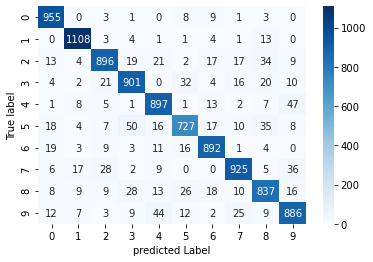

In [28]:
ax = sns.heatmap(conf, annot=True, fmt='d',cmap=plt.cm.Blues)
ax.set(xlabel="predicted Label",ylabel='True label')

https://www.cs.ryerson.ca/~aharley/vis/

In [29]:
from tensorflow.keras.datasets import fashion_mnist
(fX_train,fy_train), (fX_test,fy_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [30]:
fX_train.shape

(60000, 28, 28)

In [31]:
fy_train.shape

(60000,)

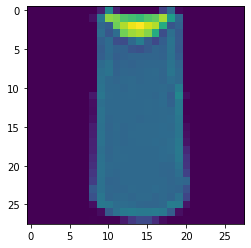

In [32]:
plt.imshow(fX_train[2].reshape(28,28))

In [33]:
fX_train=fX_train.reshape(-1,784).astype("float32")/255
fX_test=fX_test.reshape(-1,784).astype("float32")/255
fY_train=to_categorical(fy_train,nb_classes)
fY_test=to_categorical(fy_test,nb_classes)
from tensorflow.keras.optimizers import Adam

In [34]:
model = Sequential()
model.add(Dense(300,activation='relu',input_shape=(784,)))
model.add(Dense(100,activation='relu'))
model.add(Dense(nb_classes,activation='softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(),
              metrics=['accuracy'])

In [36]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [37]:
mc=ModelCheckpoint("model.hdf5",save_best_only=True)

In [38]:
es=EarlyStopping(patience=30)

In [39]:
network_history = model.fit(X_train,Y_train, batch_size=128,epochs=560,
                            verbose=1,validation_split=0.2,callbacks=[tb,mc,es])

Epoch 1/560
375/375 [==============================] - 3s 7ms/step - loss: 0.2976 - accuracy: 0.9156 - val_loss: 0.1411 - val_accuracy: 0.9570
Epoch 2/560
375/375 [==============================] - 2s 6ms/step - loss: 0.1132 - accuracy: 0.9672 - val_loss: 0.1145 - val_accuracy: 0.9667
Epoch 3/560
375/375 [==============================] - 2s 6ms/step - loss: 0.0739 - accuracy: 0.9778 - val_loss: 0.0933 - val_accuracy: 0.9720
Epoch 4/560
375/375 [==============================] - 2s 6ms/step - loss: 0.0509 - accuracy: 0.9842 - val_loss: 0.0927 - val_accuracy: 0.9725
Epoch 5/560
375/375 [==============================] - 2s 5ms/step - loss: 0.0379 - accuracy: 0.9885 - val_loss: 0.0883 - val_accuracy: 0.9730
Epoch 6/560
375/375 [==============================] - 2s 6ms/step - loss: 0.0288 - accuracy: 0.9910 - val_loss: 0.0851 - val_accuracy: 0.9765
Epoch 7/560
375/375 [==============================] - 2s 6ms/step - loss: 0.0220 - accuracy: 0.9932 - val_loss: 0.0892 - val_accuracy: 0.9772